<a href="https://colab.research.google.com/github/PedroMatumoto/AI_Notebooks/blob/main/Aula_2_Regress%C3%A3o_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import zipfile
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

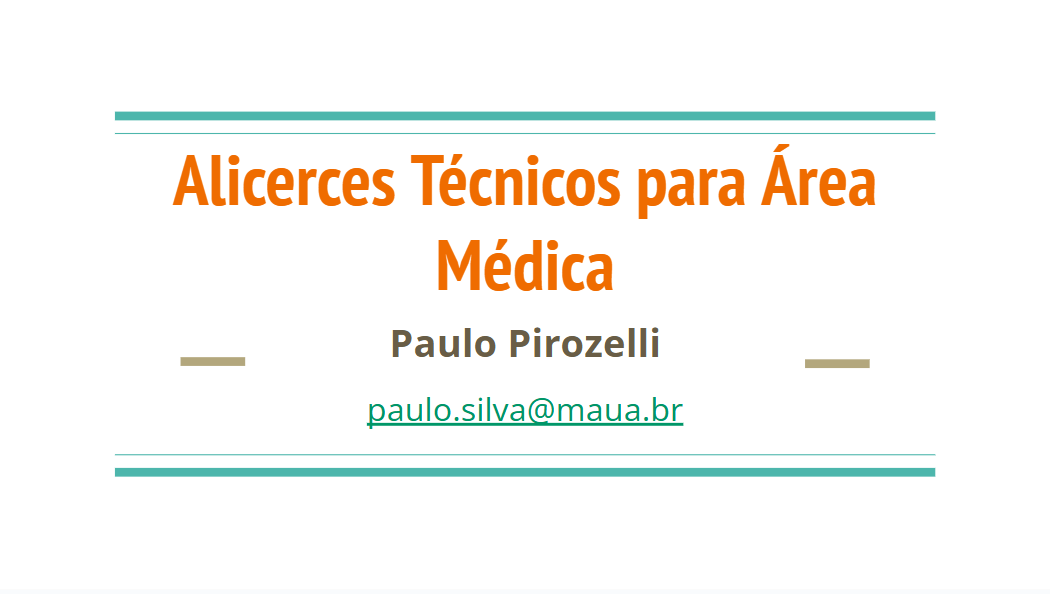

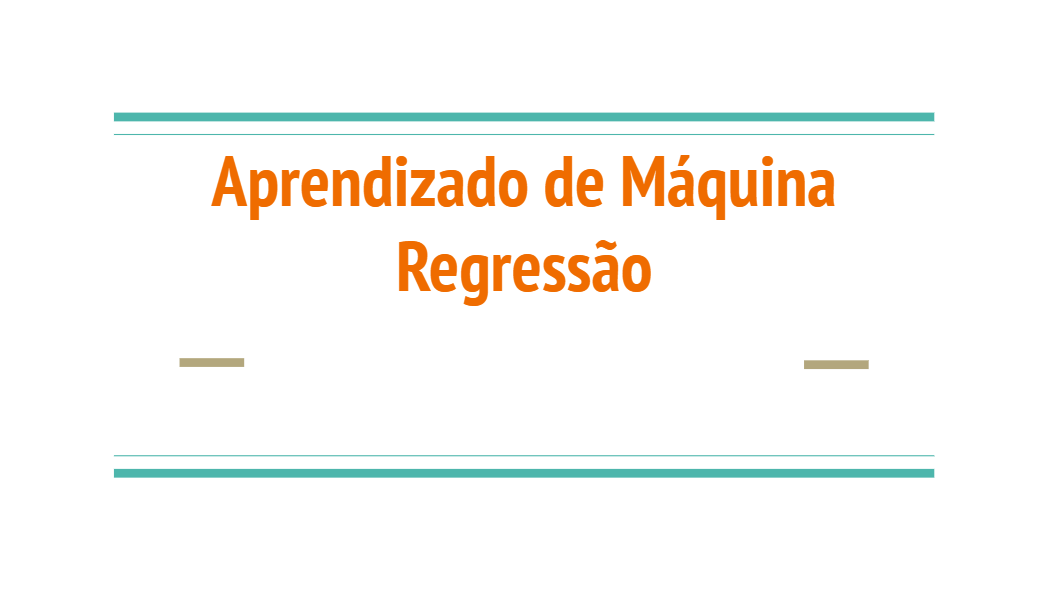

## Aprendizado de Máquina

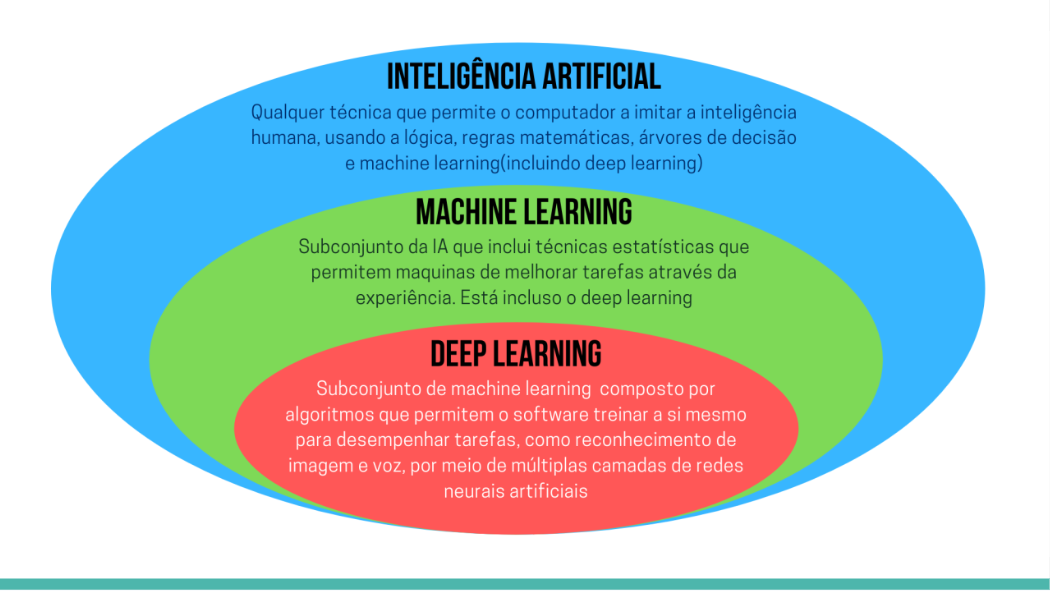

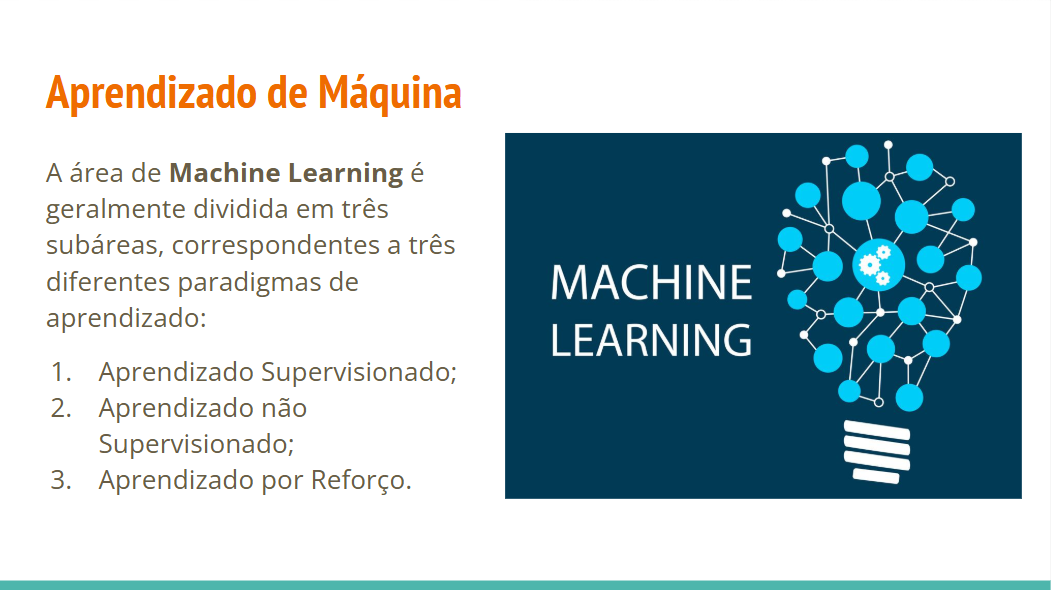

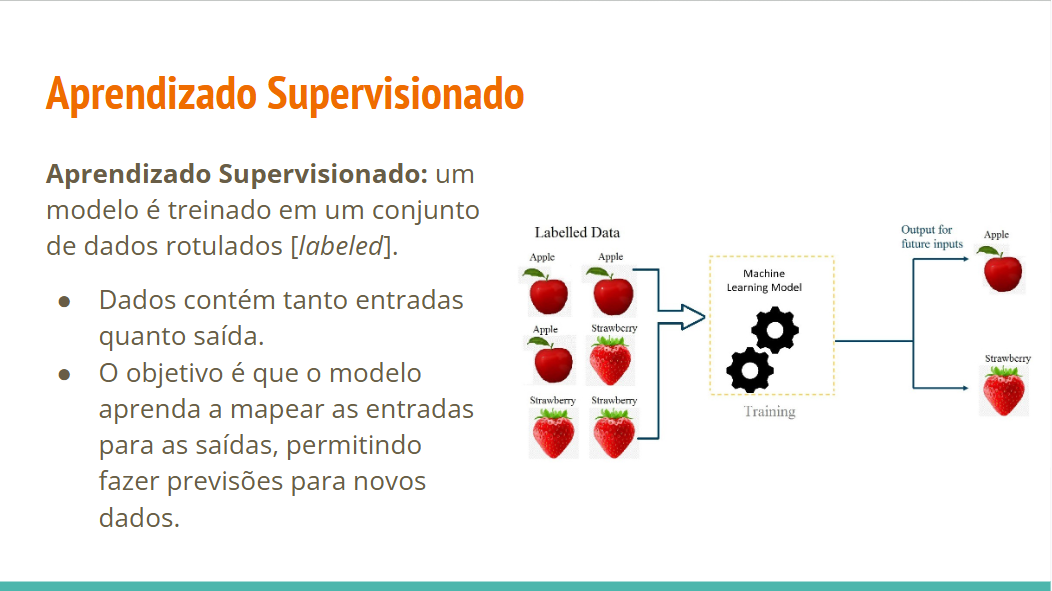

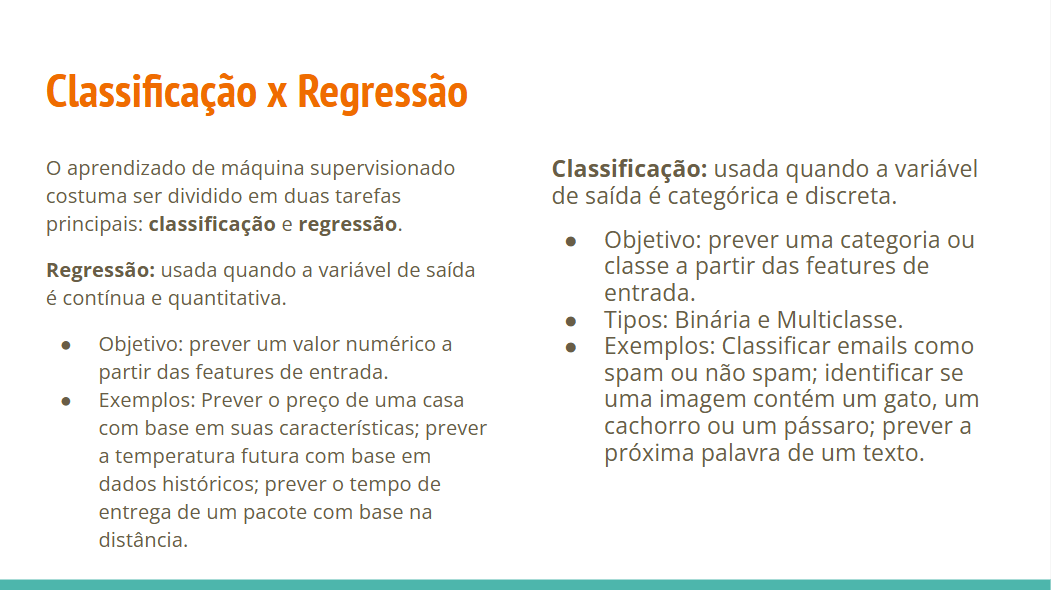

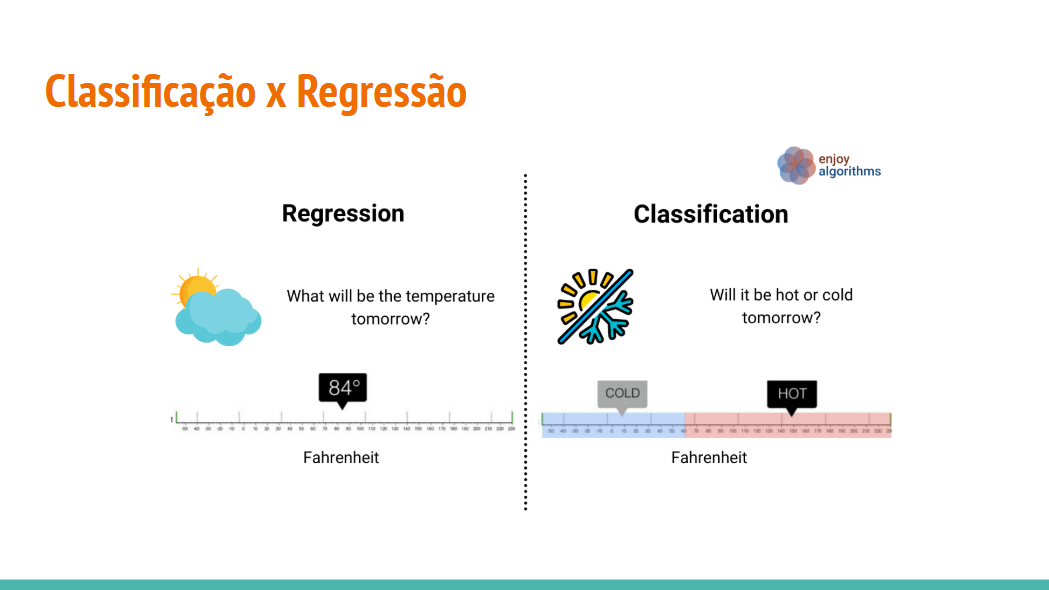

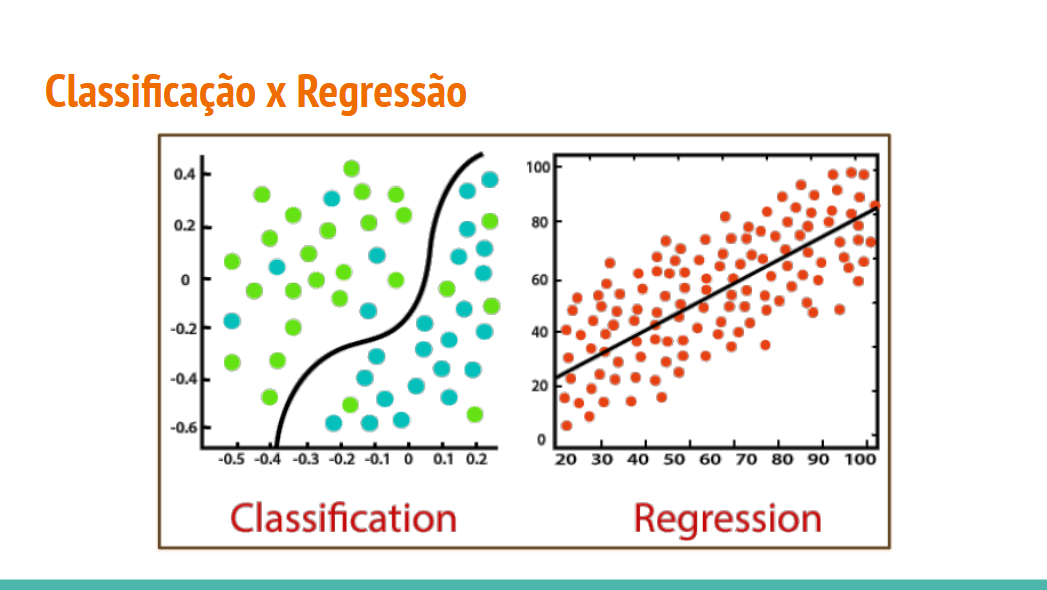

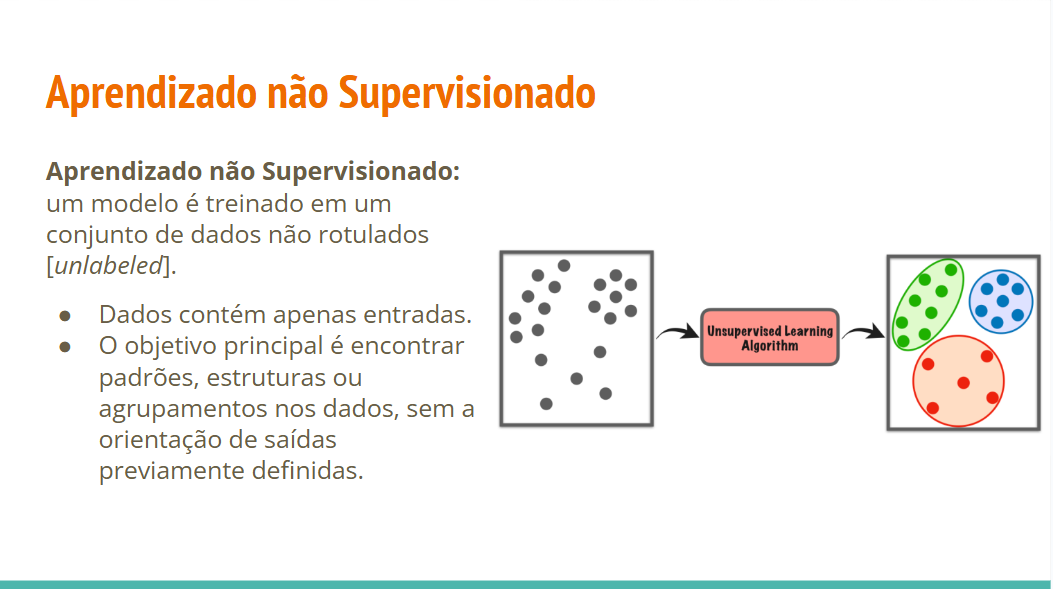

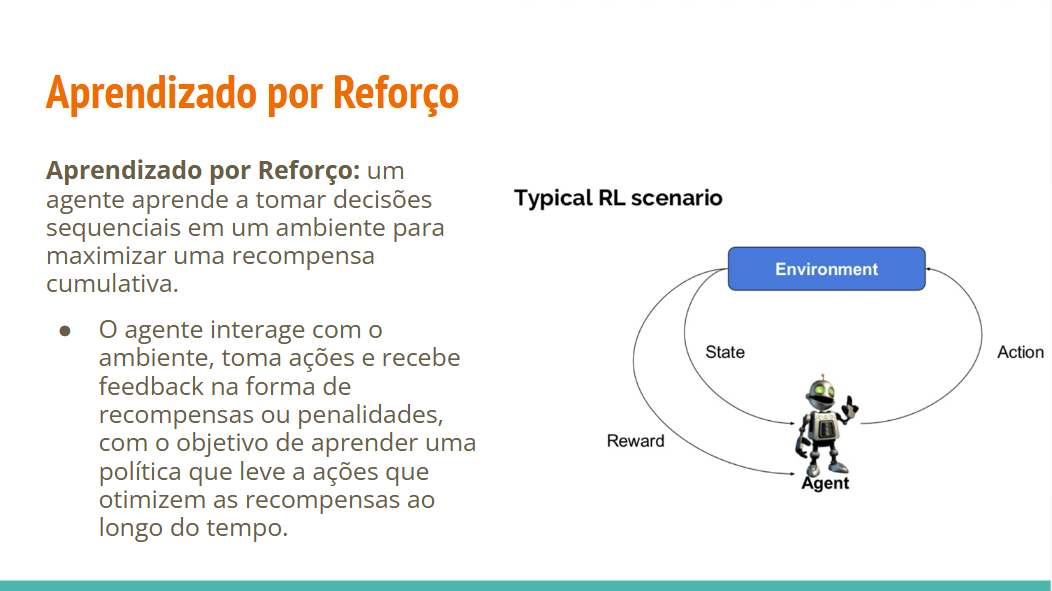

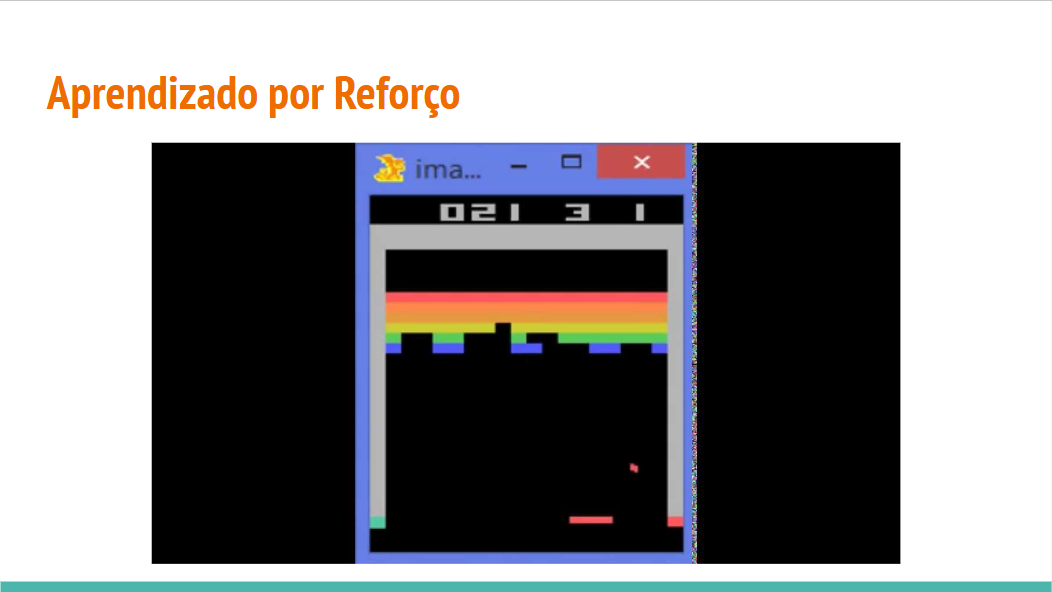

### Aplicação

Para cada um dos problemas abaixo, identifique qual tipo de aprendizado de máquina deve ser utilizado:

1. Filtragem de spams na caixa de e-mail.

2. Agrupamento de clientes com base em seu comportamento de compra.

3. Treinamento de um carro autônomo para dirigir em uma cidade simulada.

4. Diagnóstico de doenças a partir de exames médicos.

5. Redução de dimensionalidade de um conjunto de dados genéticos.

6. Tradução automática de textos de uma língua para outra.

7. Treinamento de um robô para empilhar blocos.

8. Detecção de fraudes em transações bancárias.

9. Agrupamento de notícias com temas semelhantes.

10. Análise de sentimentos em postagens de redes sociais.

## Regressão Linear

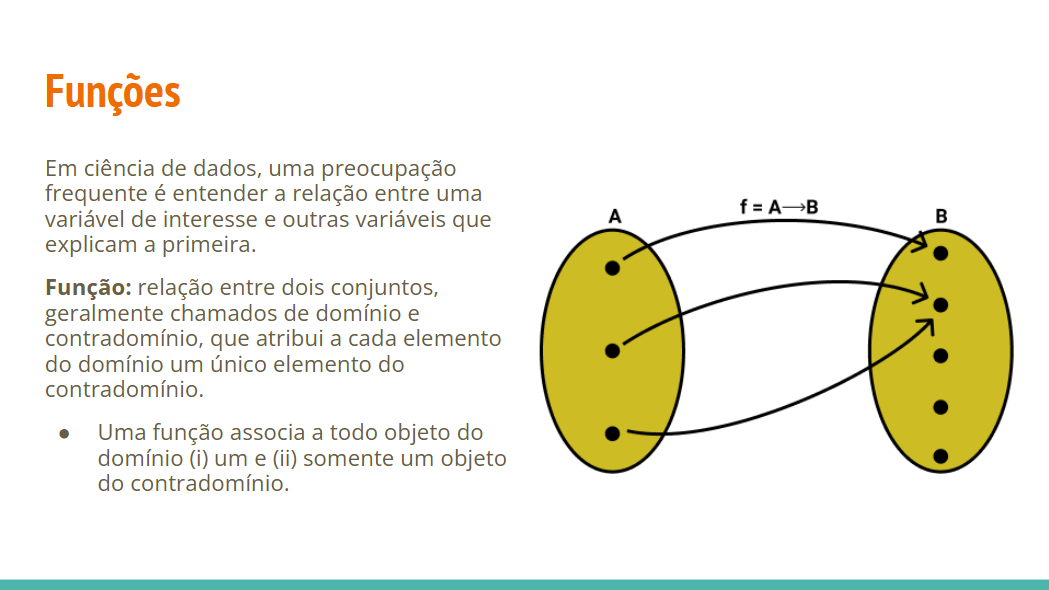

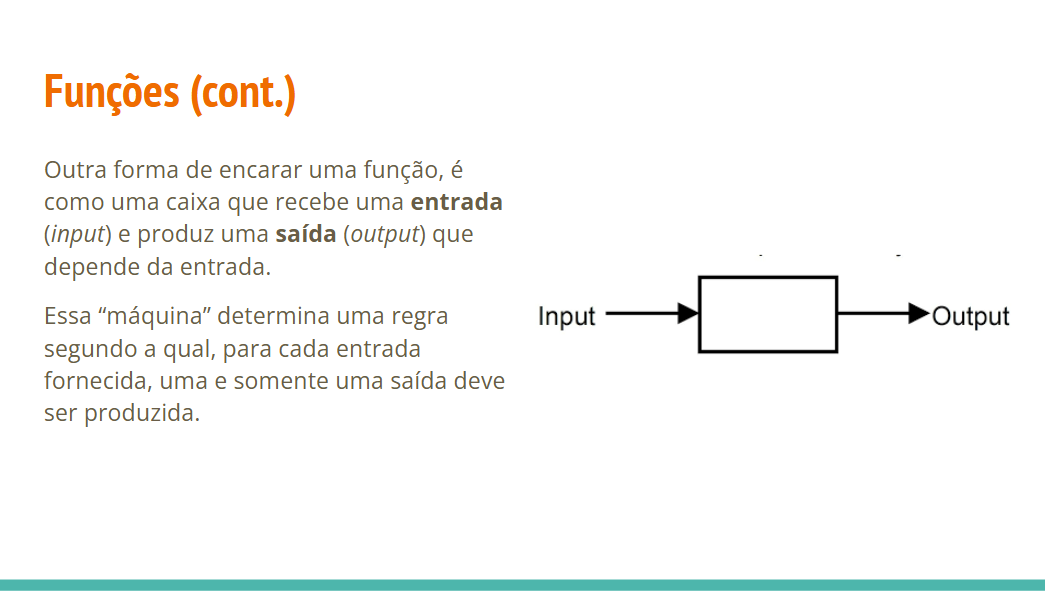

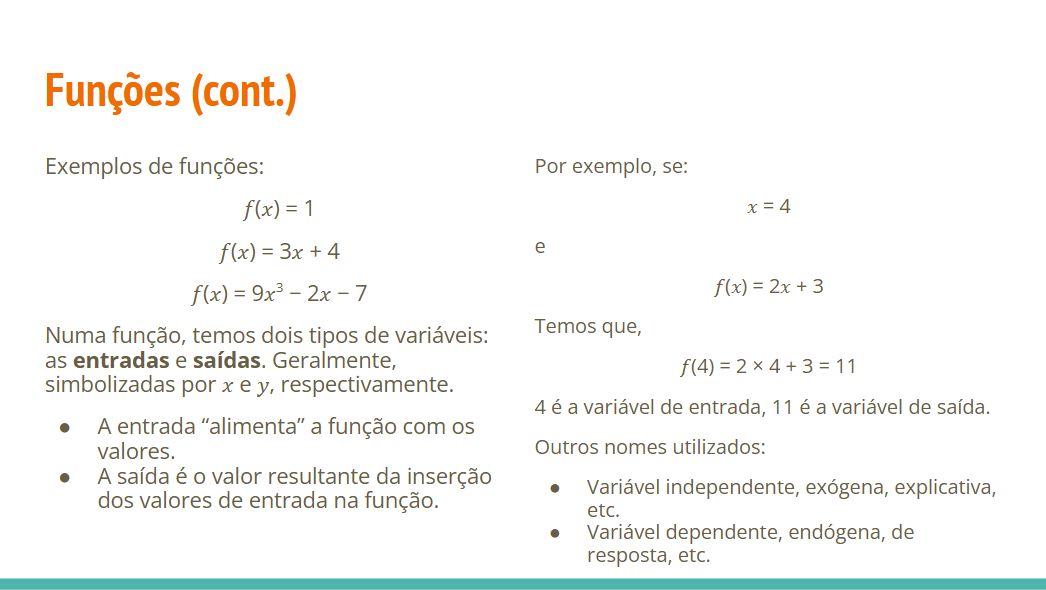

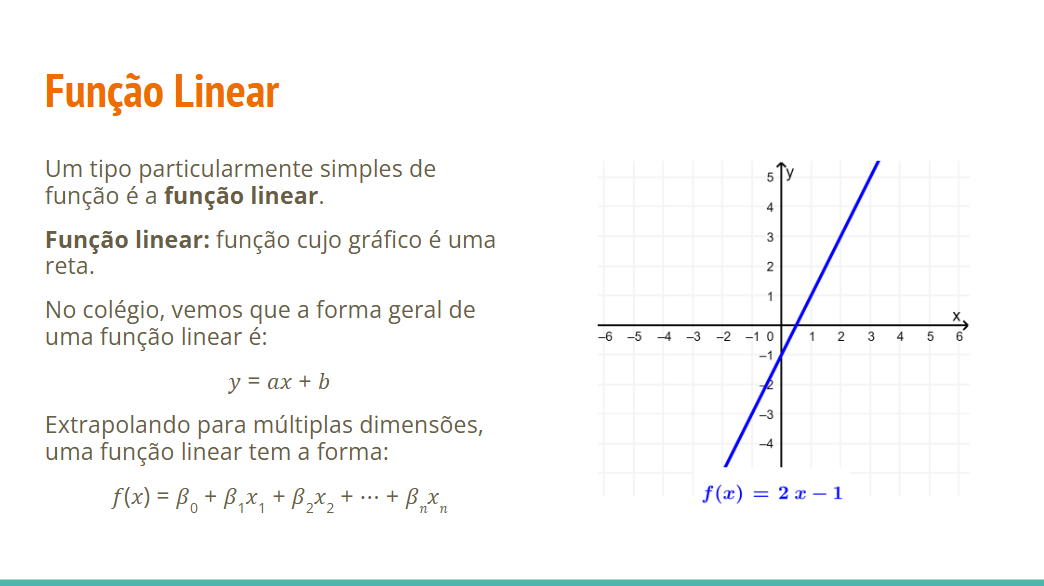

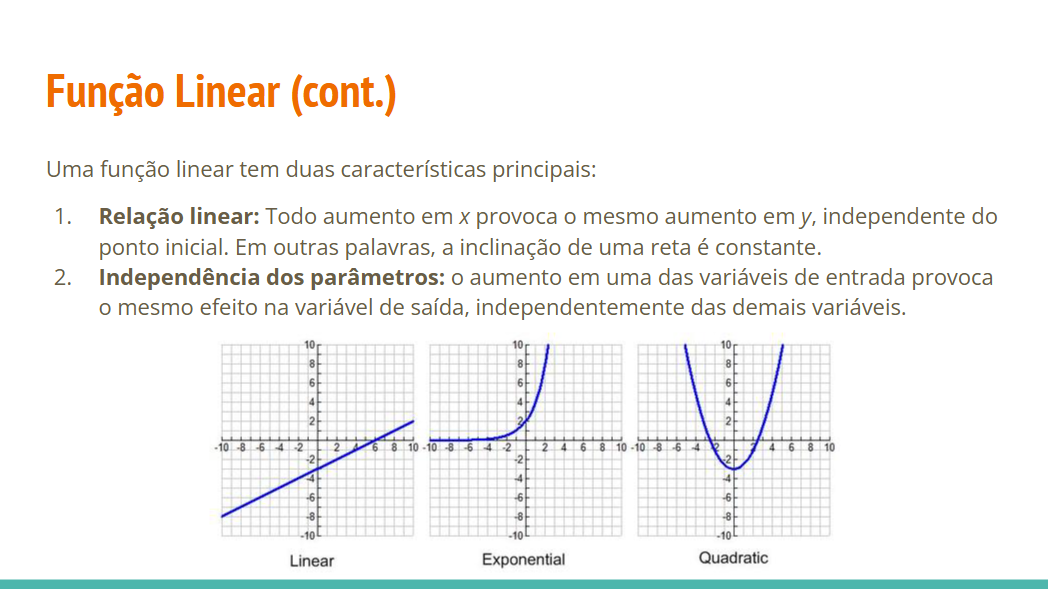

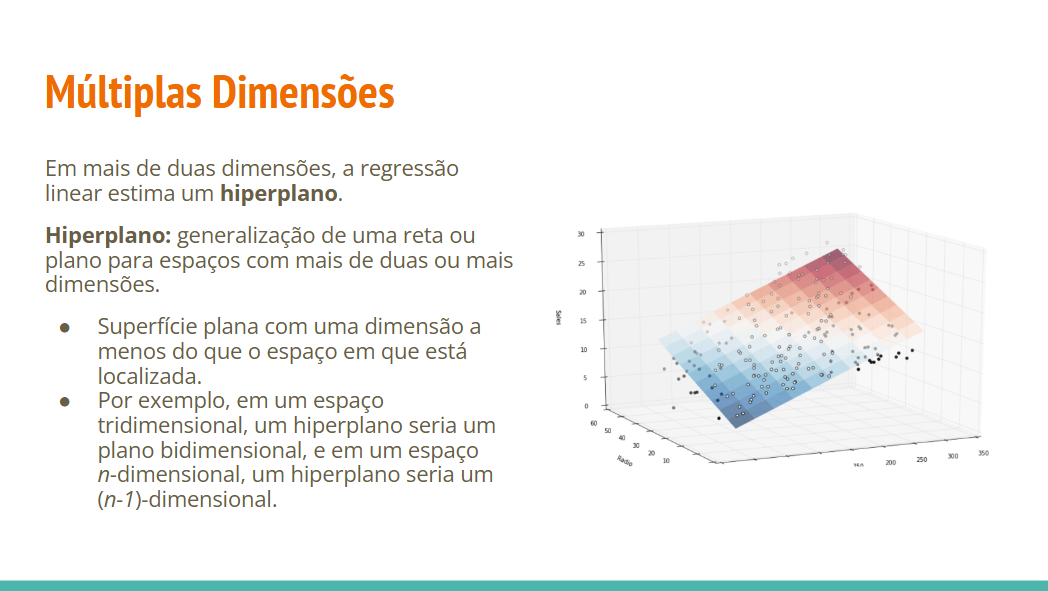

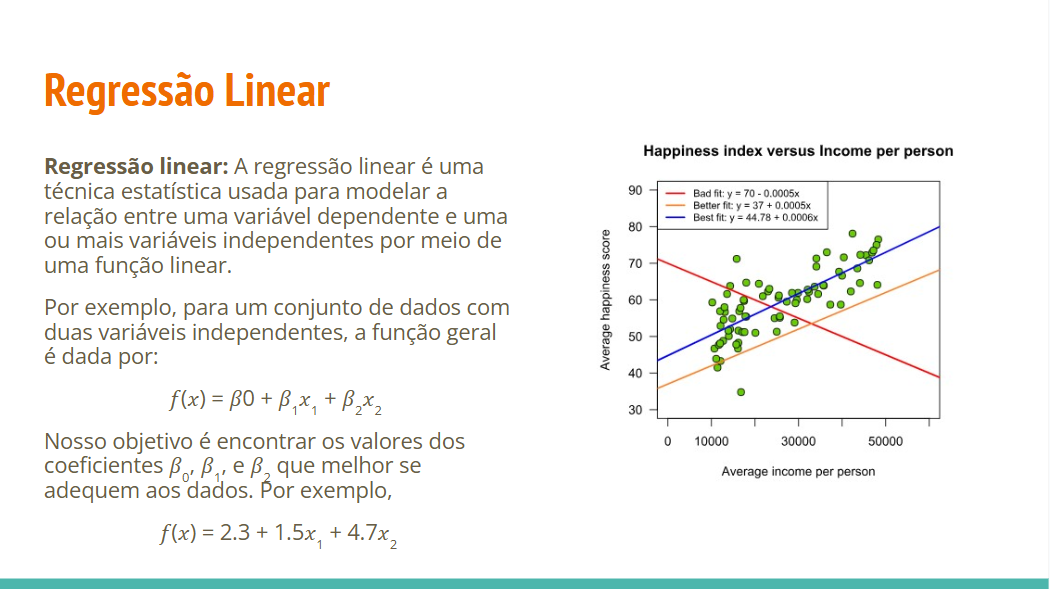

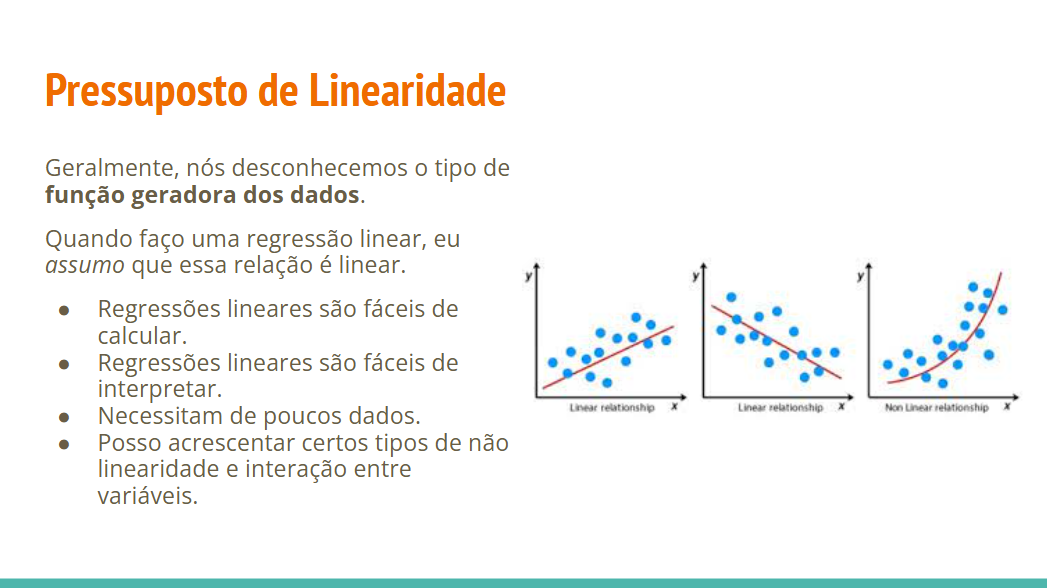

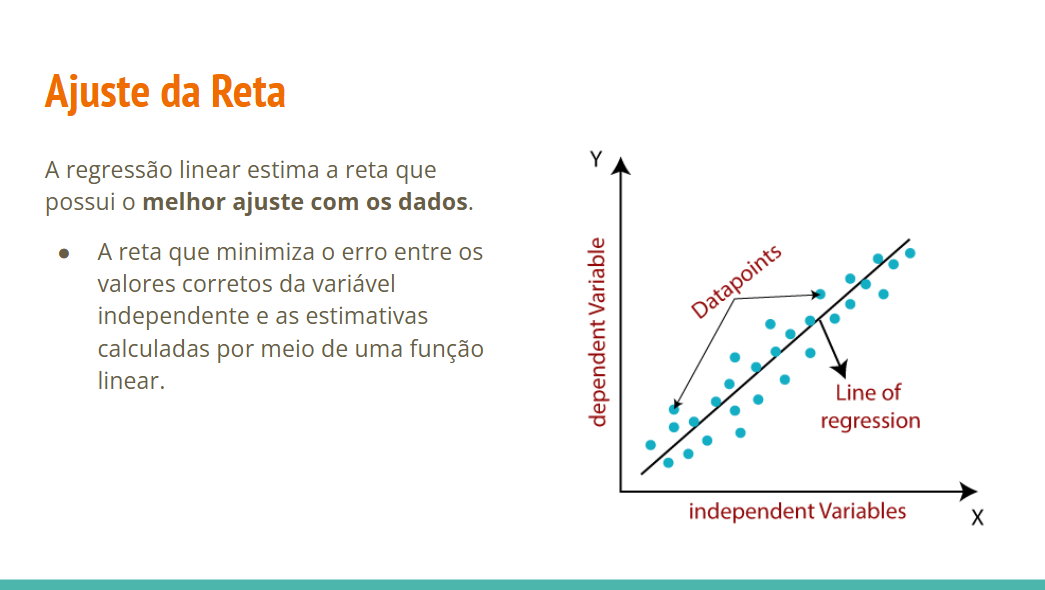

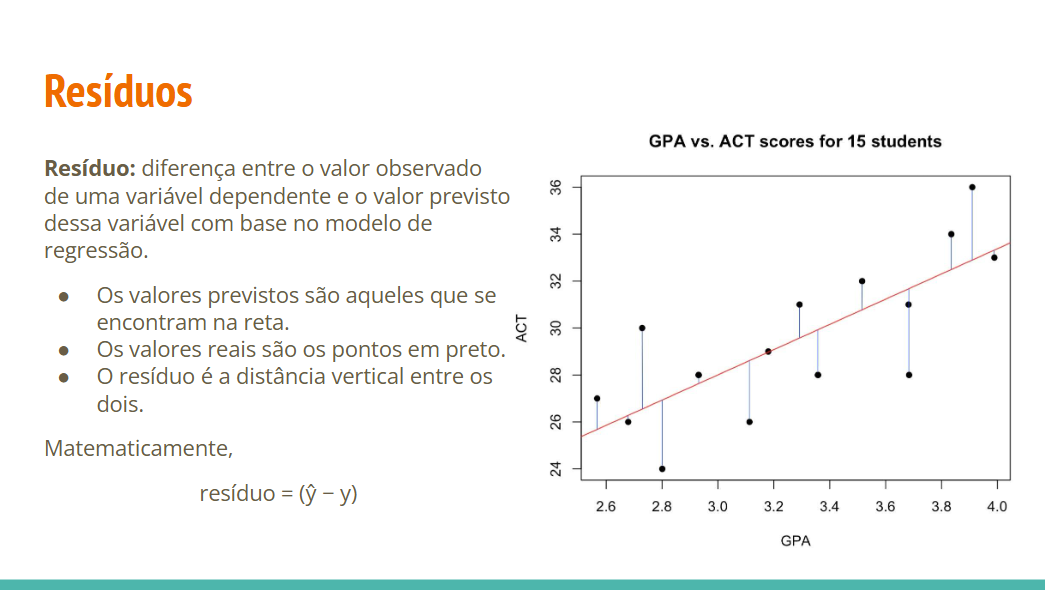

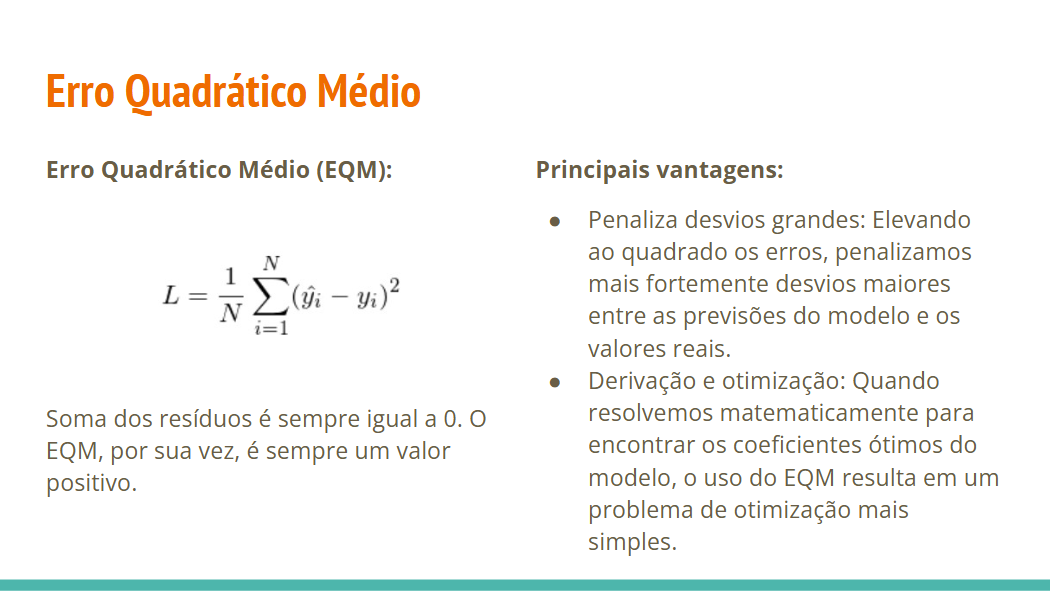

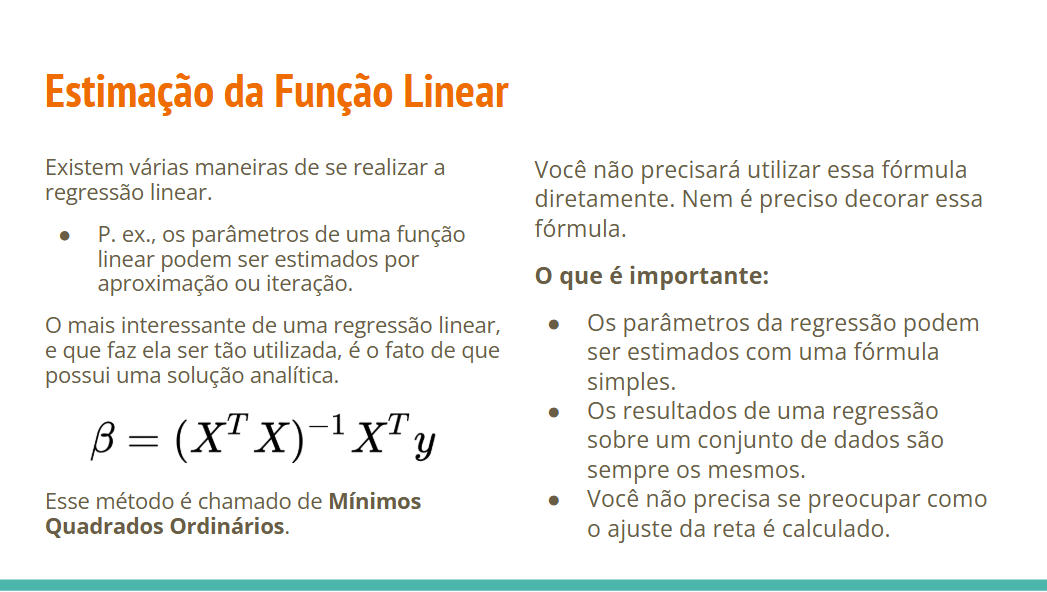

## Sumário da Regressão

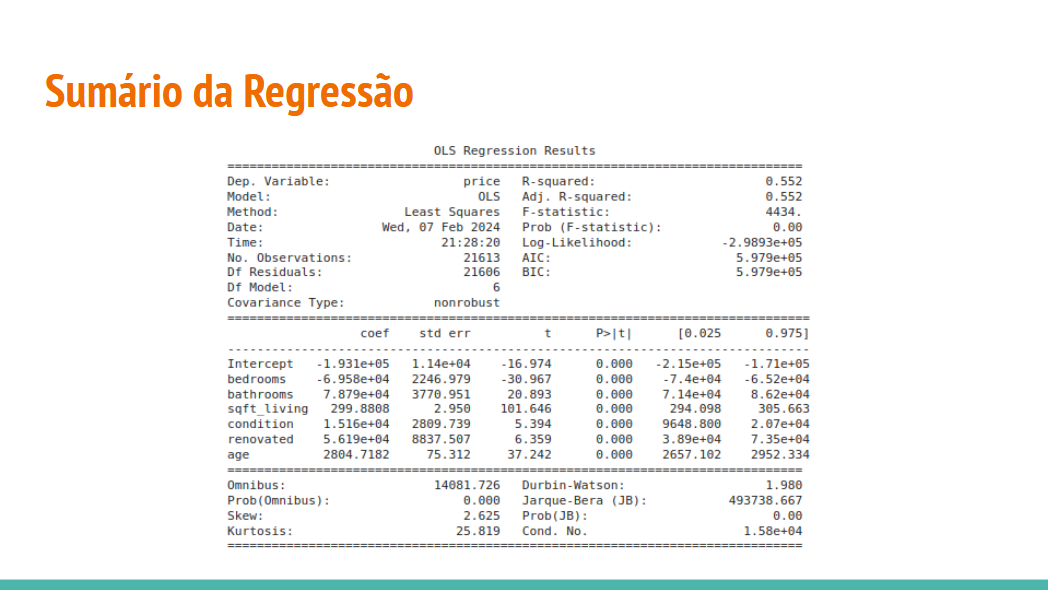

### Informações dos Coeficientes

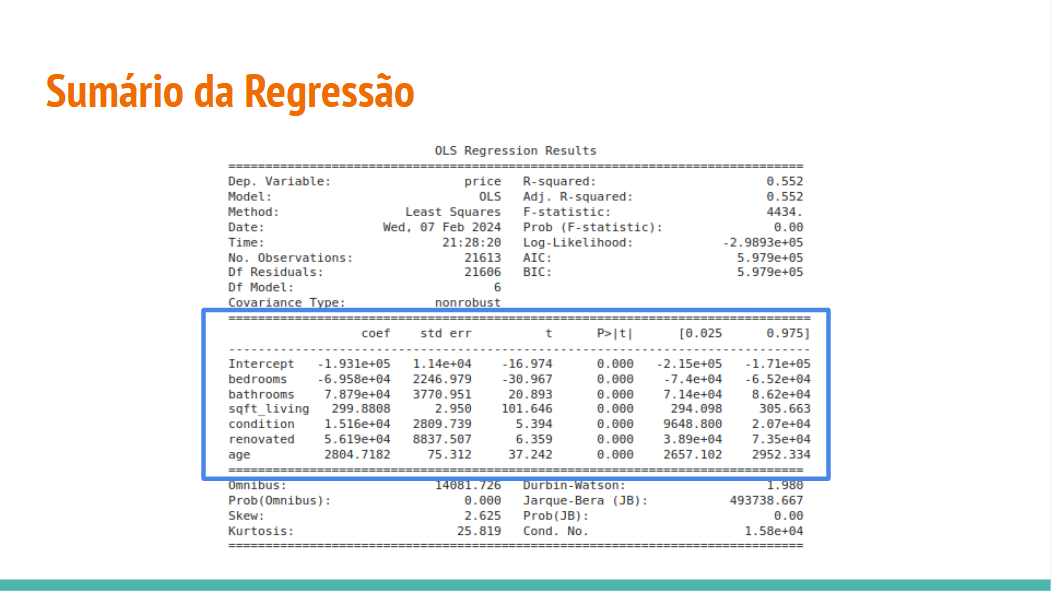

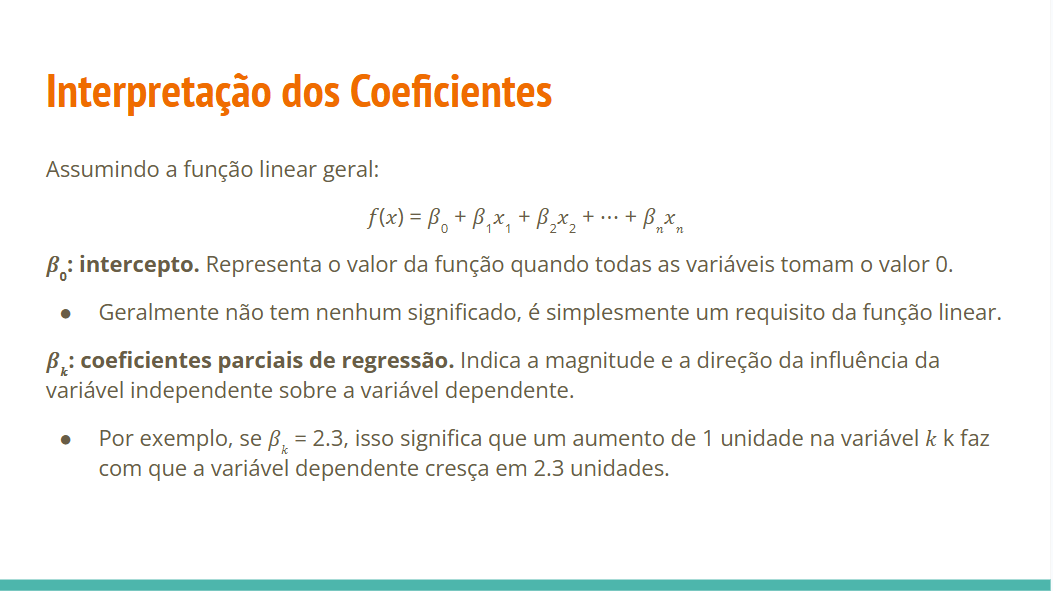

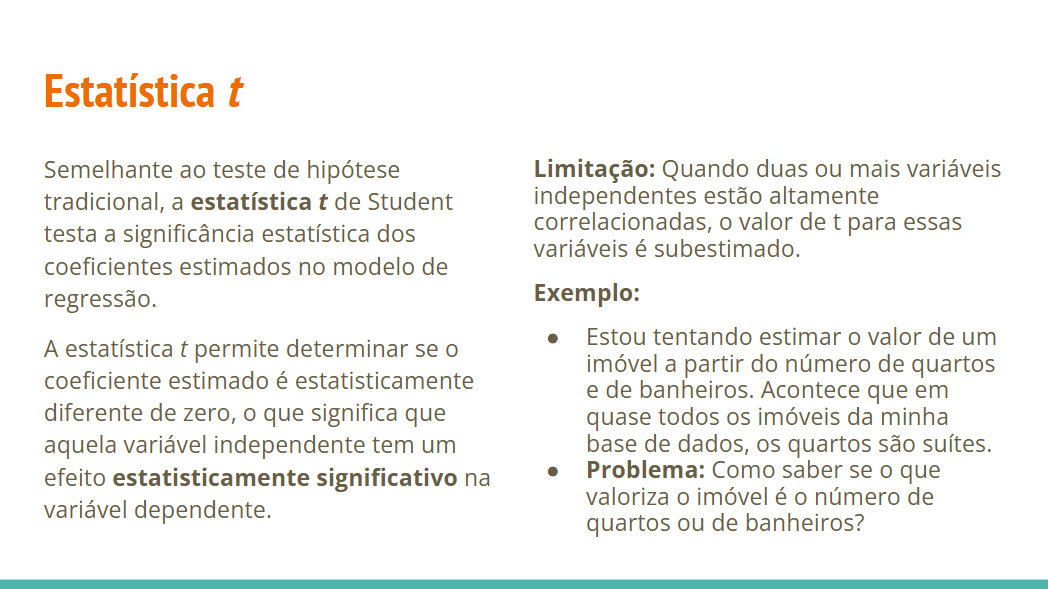

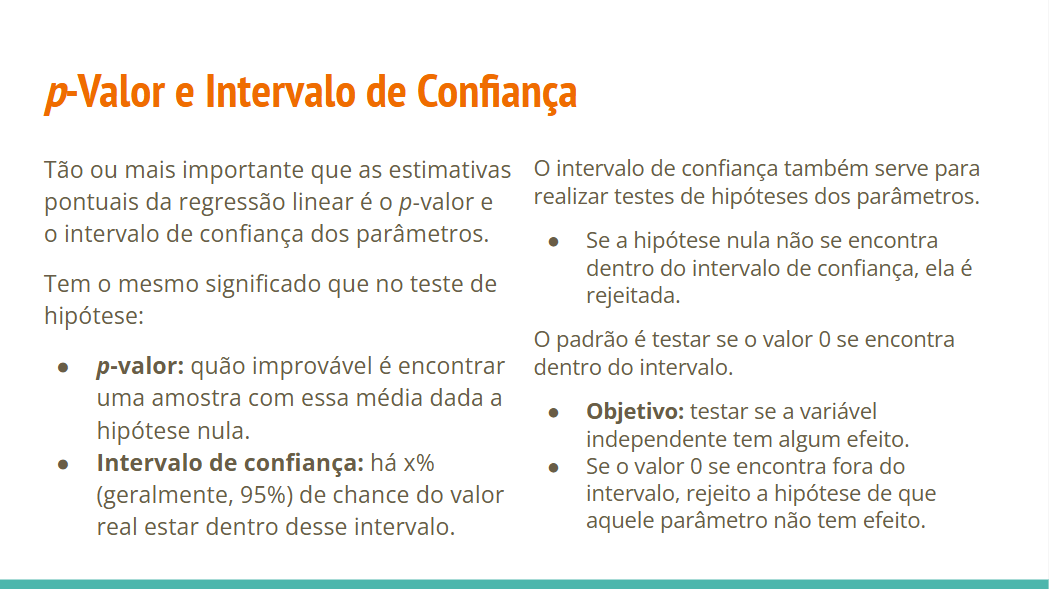

### Informações Globais do Modelo

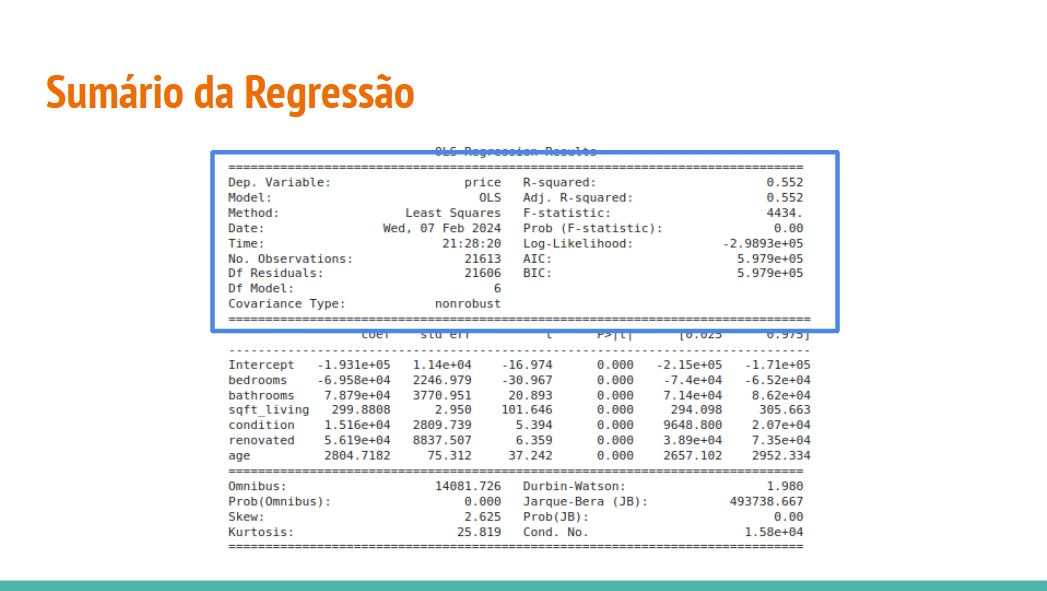

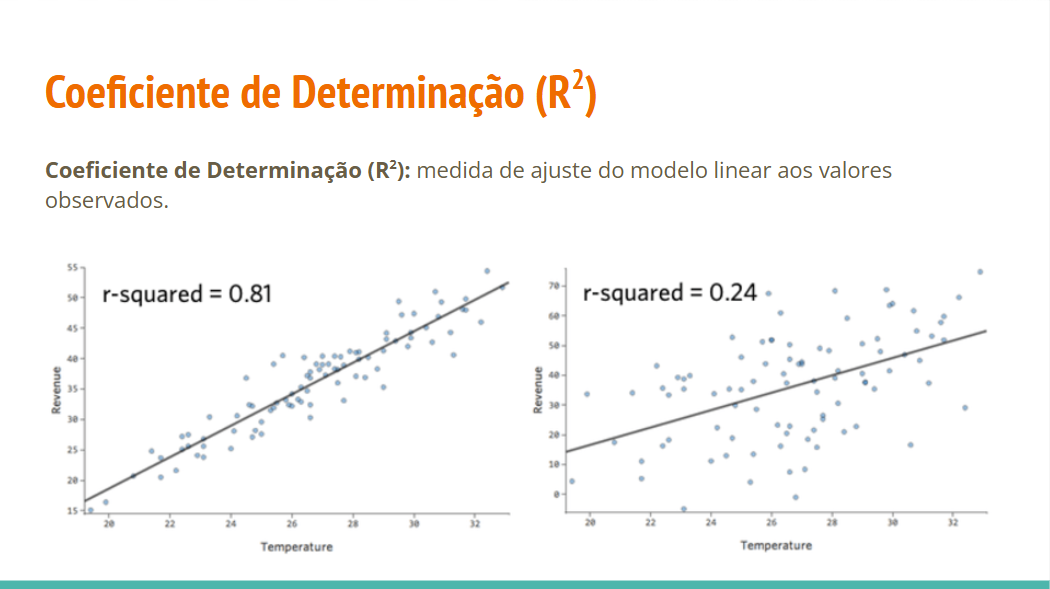

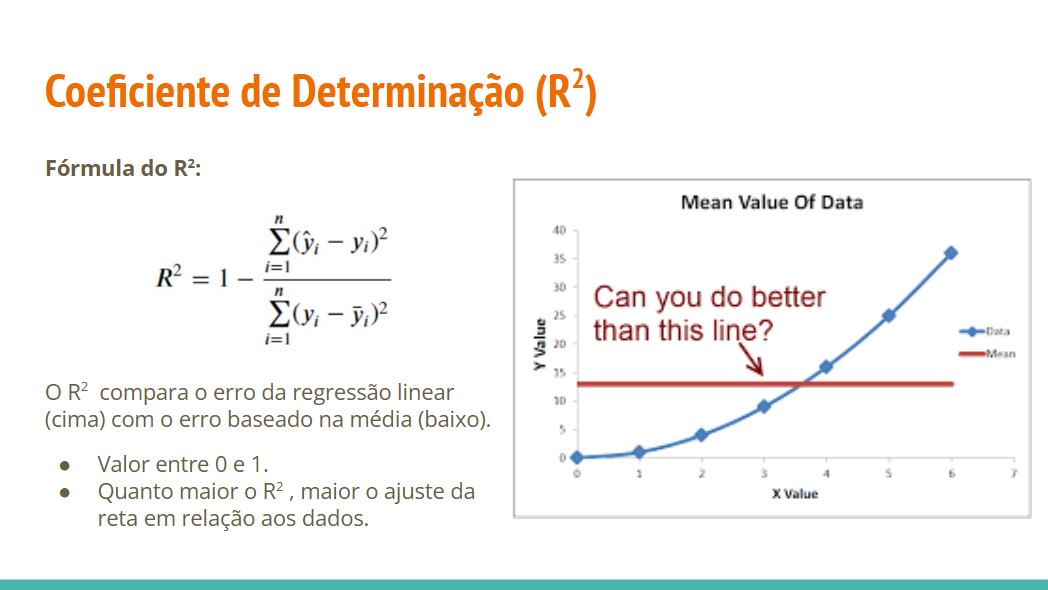

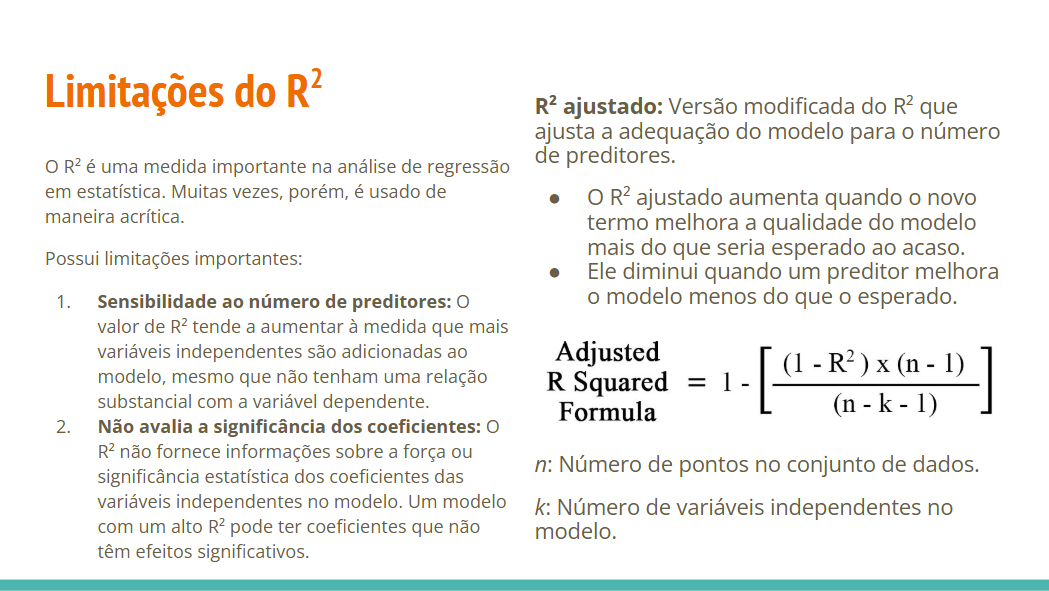

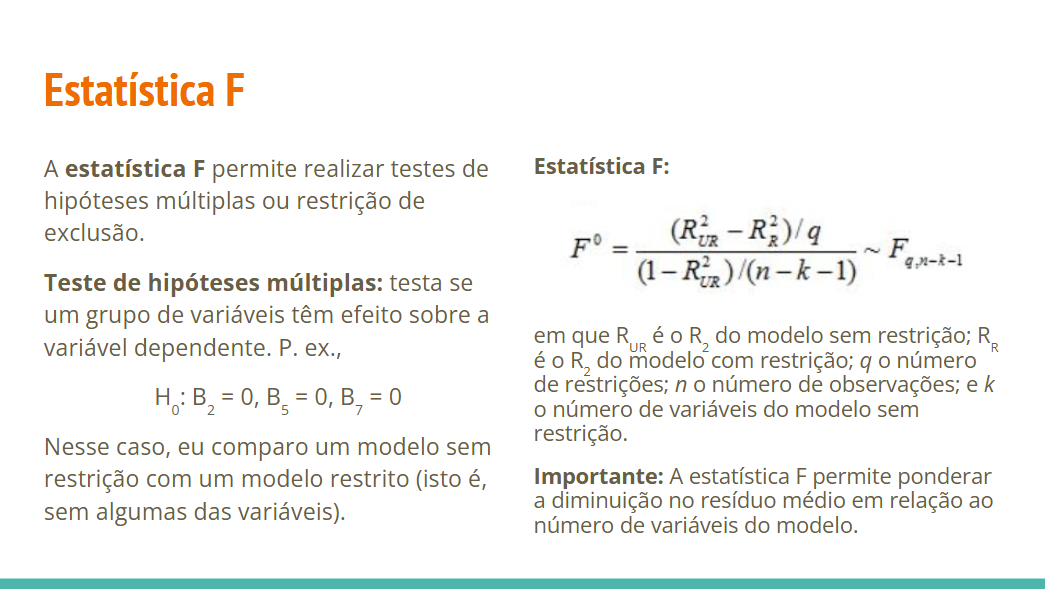

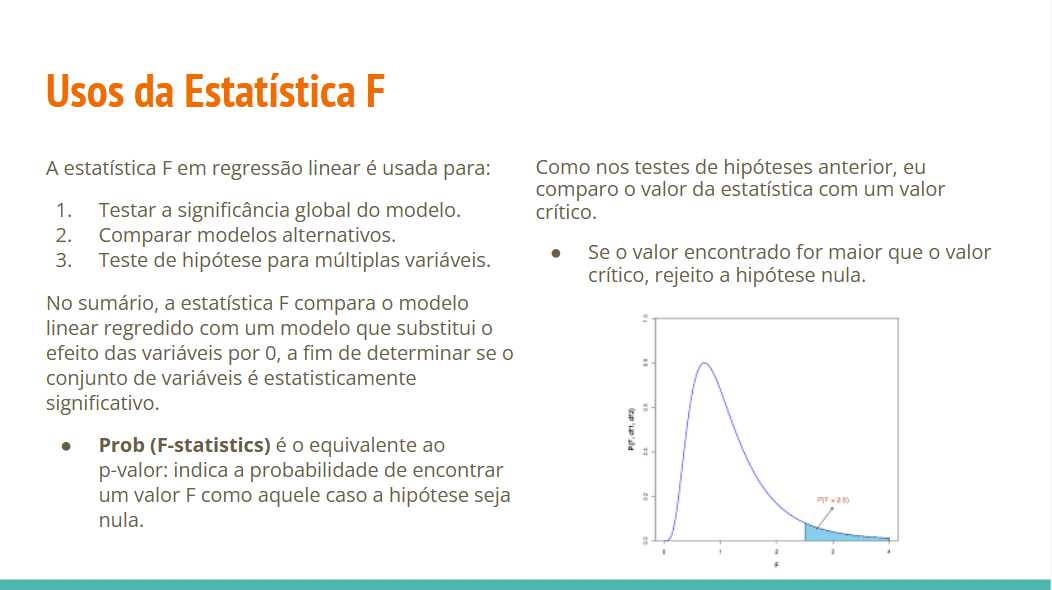

### Extensões

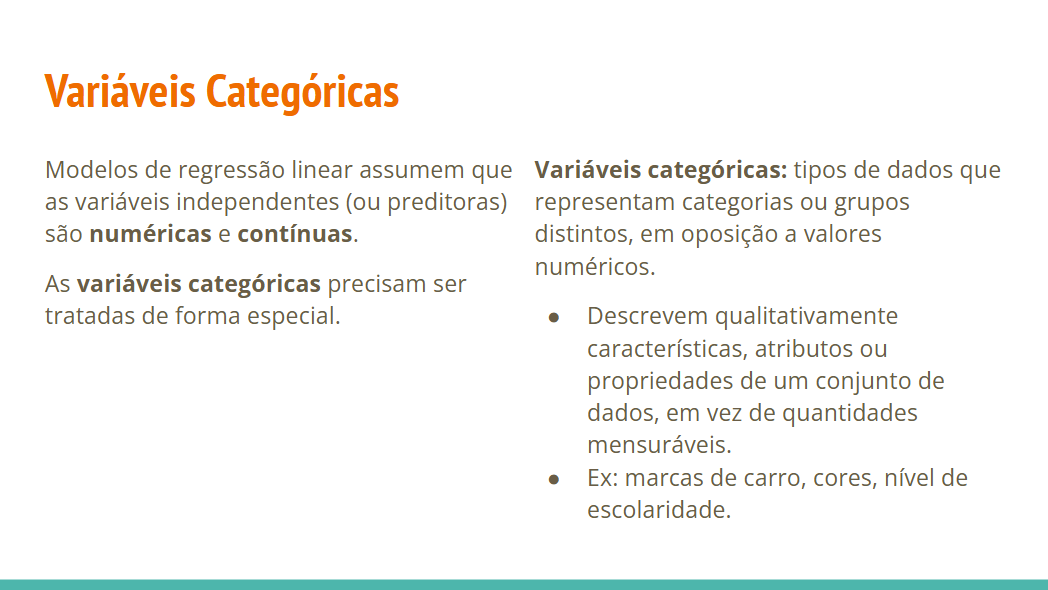

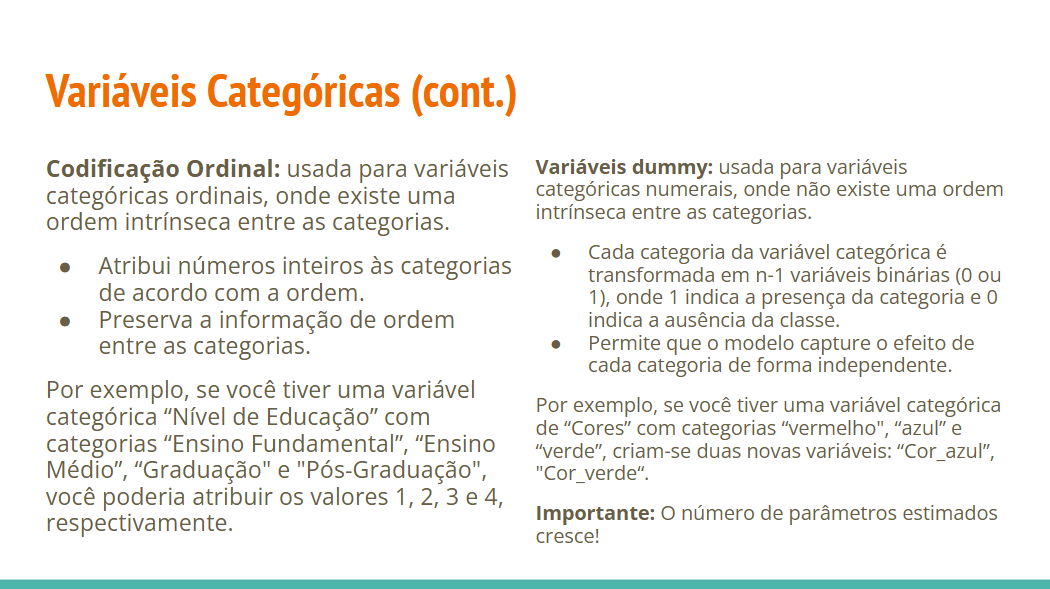

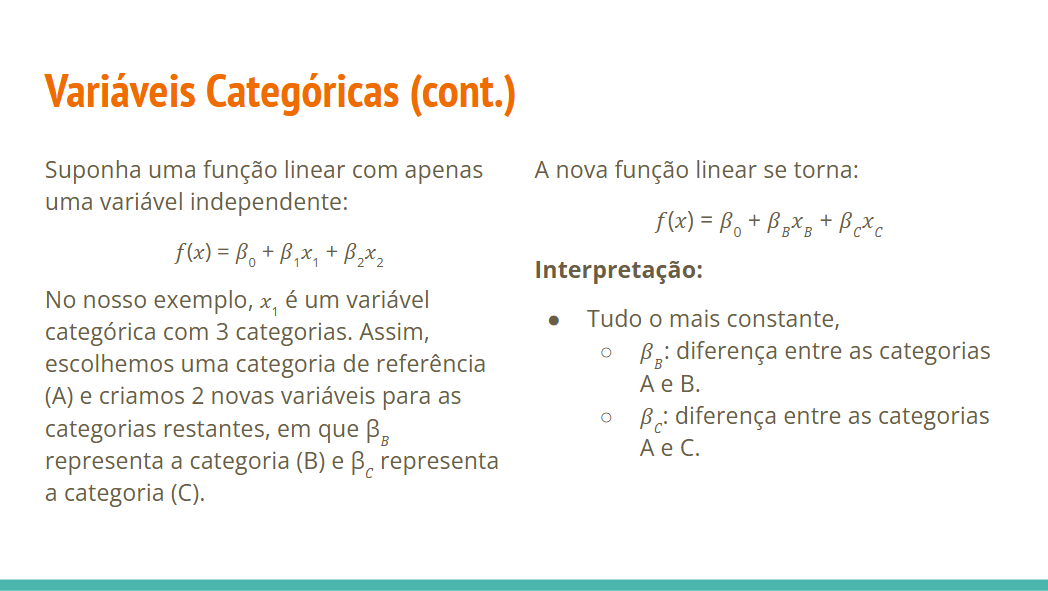

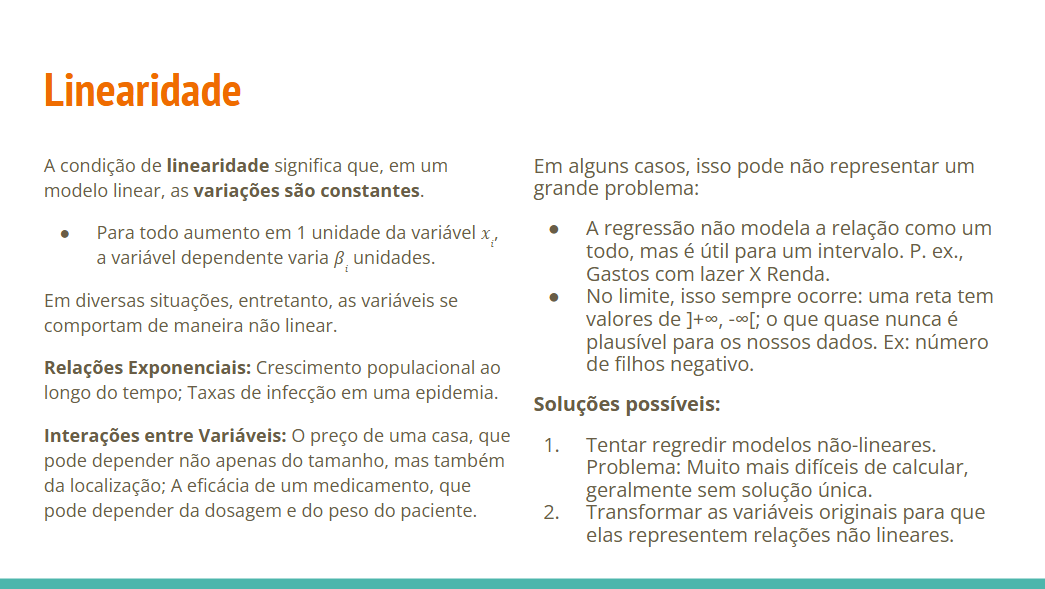

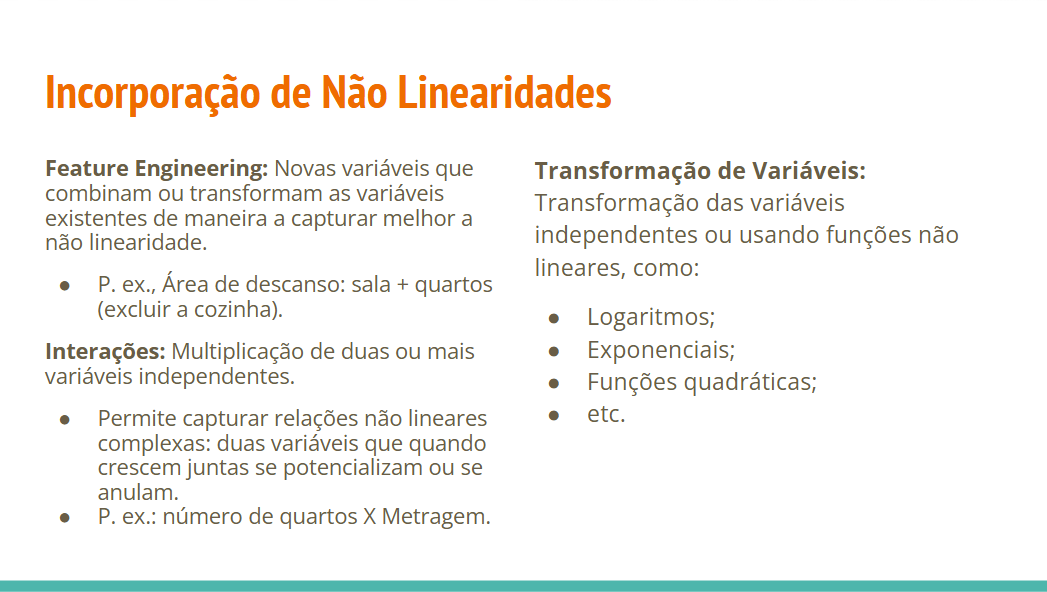

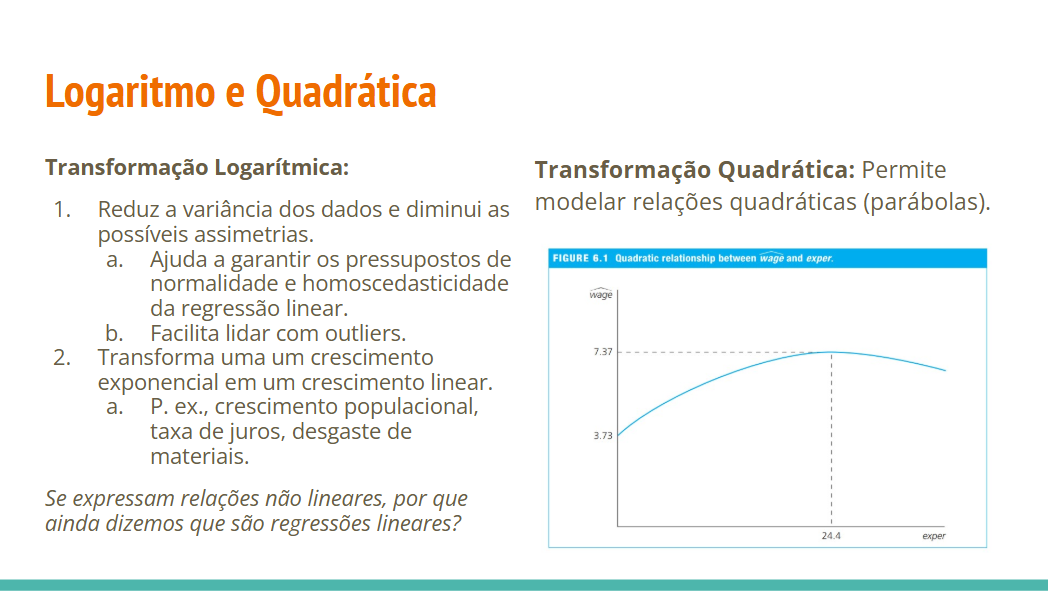

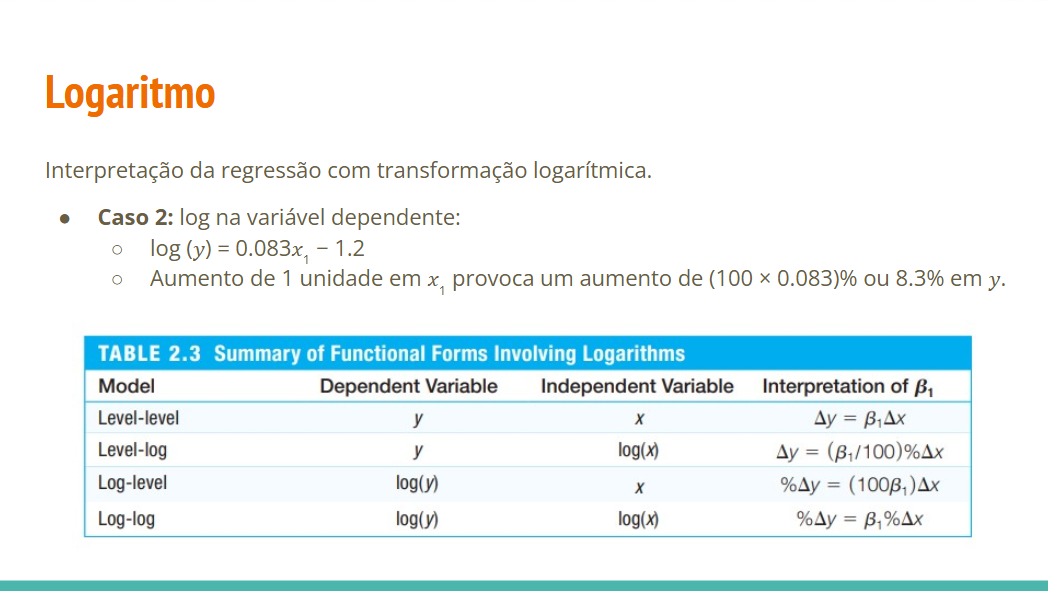

## Exercícios

Vamos considerar três situações diferentes para interpretar os resulatdos da regressão linear. Para cada um, responda às seguintes perguntas:

1. Qual as variáveis de entrada e saída?
2. Quais coeficientes são mais importantes?
3. O modelo está bem ajustado aos dados?

### Previsão de Preço de Casas

**Objetivo:** Prever o preço médio de casas na Califórnia com base em características como renda média, número de quartos e idade do imóvel.

**Link:** https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [ ]:
# Carregar o dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  # Variável alvo

# Selecionar algumas features para a regressão
X = df[['MedInc', 'AveRooms', 'HouseAge']]
y = df['Price']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionar constante para o modelo
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Criar e treinar o modelo
model = sm.OLS(y_train, X_train_const).fit()

# Fazer previsões
y_pred = model.predict(X_test_const)

# Exibir sumário da regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     5860.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:53:09   Log-Likelihood:                -19839.
No. Observations:               16512   AIC:                         3.969e+04
Df Residuals:                   16508   BIC:                         3.972e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0173      0.025      0.697      0.4

### Previsão de Consumo de Combustível

**Objetivo:** Prever o consumo de combustível (milhas por galão, mpg) com base em características como peso e potência do motor.

**Link:** https://archive.ics.uci.edu/dataset/9/auto+mpg

In [ ]:
# Carregar o dataset
df = sns.load_dataset("mpg").dropna()  # Remover valores nulos

# Converter 'horsepower' para numérico, pois pode conter valores não numéricos
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()  # Remover valores ausentes após conversão

# Selecionar features relevantes
X = df[['weight', 'horsepower']]
y = df['mpg']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionar constante para o modelo
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Criar e treinar o modelo
model = sm.OLS(y_train, X_train_const).fit()

# Fazer previsões
y_pred = model.predict(X_test_const)

# Exibir sumário da regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     388.8
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           3.20e-85
Time:                        17:53:09   Log-Likelihood:                -896.34
No. Observations:                 313   AIC:                             1799.
Df Residuals:                     310   BIC:                             1810.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5867      0.901     51.695      0.0

### Previsão de Desempenho Estudantil

**Objetivo:** Prever a nota final de alunos com base em fatores como horas de estudo, faltas e reprovações.

**Link:** https://archive.ics.uci.edu/dataset/320/student+performance

In [ ]:
# URL do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

# Fazer o download e extrair o ZIP
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content), "r") as z:
    with z.open("student-mat.csv") as file:  # Escolher o arquivo correto (no caso, desempenho em matemática)
        df = pd.read_csv(file, sep=";")  # O separador do CSV é ponto e vírgula (;)

# Selecionar features e variável alvo
X = df[['studytime', 'failures', 'absences']]
y = df['G3']  # Nota final

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionar constante para o modelo
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Criar e treinar o modelo
model = sm.OLS(y_train, X_train_const).fit()

# Fazer previsões
y_pred = model.predict(X_test_const)

# Exibir sumário da regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     18.88
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           2.80e-11
Time:                        17:53:27   Log-Likelihood:                -903.09
No. Observations:                 316   AIC:                             1814.
Df Residuals:                     312   BIC:                             1829.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7922      0.684     14.326      0.0

### Transformações de Variáveis

Podemos utilizar transformações das variáveis no nosso modelo, de forma a incorporar não linearidades.

1. Transformação logarítmicas:

In [ ]:
# Carregar o dataset
df = sns.load_dataset("mpg").dropna()  # Remover valores nulos

# Converter 'horsepower' para numérico (pode conter valores não numéricos)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()  # Remover valores ausentes após conversão

# Aplicar transformação logarítmica na variável 'weight'
df['log_weight'] = np.log1p(df['weight'])  # log(1 + weight)

# Selecionar features (substituímos 'weight' por 'log_weight')
X = df[['log_weight', 'horsepower']]
y = df['mpg']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionar constante para o modelo
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Criar e treinar o modelo
model = sm.OLS(y_train, X_train_const).fit()

# Fazer previsões
y_pred = model.predict(X_test_const)

# Exibir sumário da regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     432.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           2.15e-90
Time:                        17:53:28   Log-Likelihood:                -884.31
No. Observations:                 313   AIC:                             1775.
Df Residuals:                     310   BIC:                             1786.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.9639     11.156     15.683      0.0

**Importante:** np.log1p(x) computa log(1 + x), garantindo que valores zero não causem erros (log(0) é indefinido).

2. Transformação Quadrática

In [ ]:
# Carregar o dataset
df = sns.load_dataset("mpg").dropna()  # Remover valores nulos

# Converter 'horsepower' para numérico (pode conter valores não numéricos)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()  # Remover valores ausentes após conversão

# Criar a transformação quadrática para 'weight'
df['weight_squared'] = df['weight'] ** 2

# Selecionar features (incluímos 'weight' e 'weight_squared')
X = df[['weight', 'weight_squared', 'horsepower']]
y = df['mpg']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionar constante para o modelo
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Criar e treinar o modelo
model = sm.OLS(y_train, X_train_const).fit()

# Fazer previsões
y_pred = model.predict(X_test_const)

# Exibir sumário da regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     302.9
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           1.16e-91
Time:                        17:53:28   Log-Likelihood:                -878.15
No. Observations:                 313   AIC:                             1764.
Df Residuals:                     309   BIC:                             1779.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             65.9398      3.250     20.

2. Interação entre variáveis

In [ ]:
# Carregar o dataset
df = sns.load_dataset("mpg").dropna()  # Remover valores nulos

# Converter 'horsepower' para numérico (pode conter valores não numéricos)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()  # Remover valores ausentes após conversão

# Criar a variável de interação entre 'weight' e 'horsepower'
df['weight_hp_interaction'] = df['weight'] * df['horsepower']

# Selecionar features (agora incluindo a interação)
X = df[['weight', 'horsepower', 'weight_hp_interaction']]
y = df['mpg']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionar constante para o modelo
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Criar e treinar o modelo
model = sm.OLS(y_train, X_train_const).fit()

# Fazer previsões
y_pred = model.predict(X_test_const)

# Exibir sumário da regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     322.8
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           7.35e-95
Time:                        17:53:28   Log-Likelihood:                -870.68
No. Observations:                 313   AIC:                             1749.
Df Residuals:                     309   BIC:                             1764.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    65.24

### Ajustando Novos Modelos Lineares

Considere agora outras variáveis para cada uma das situações. Responda às seguintes questões:

1. Quais os efeitos das novas variáveis?
2. O que acontece com as variáveis antigas?
3. Qual o impacto global sobre o modelo?
4. Qual versão de cada modelo mostra o melhor resultado?

In [ ]:
# Carregar o dataset
df = sns.load_dataset("mpg").dropna()  # Remover valores nulos

df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
df_numeric = df.select_dtypes(include='number')

df_numeric.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [ ]:
# Carregar o dataset
df = sns.load_dataset("mpg").dropna()  # Remover valores nulos

# Converter 'horsepower' para numérico (pode conter valores não numéricos)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()  # Remover valores ausentes após conversão

# Criar a variável de interação entre 'weight' e 'horsepower'
df['weight_hp_interaction'] = df['weight'] * df['horsepower']
df['log_weight'] = np.log1p(df['weight'])  # log(1 + weight)
df['log_hp'] = np.log1p(df['horsepower'])  # log(1 + weight)


# Selecionar features (agora incluindo a interação)
X = df[['cylinders', 'log_hp', 'log_weight']]
y = df['mpg']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionar constante para o modelo
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Criar e treinar o modelo
model = sm.OLS(y_train, X_train_const).fit()

# Fazer previsões
y_pred = model.predict(X_test_const)

# Exibir sumário da regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     307.9
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           1.80e-92
Time:                        00:53:00   Log-Likelihood:                -876.26
No. Observations:                 313   AIC:                             1761.
Df Residuals:                     309   BIC:                             1775.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.3788     12.265     14.543      0.0

### Prevendo Custos Médicos de Pacientes

Uma seguradora de saúde deseja desenvolver um modelo preditivo para estimar os custos médicos de pacientes com base em fatores como idade, IMC, tabagismo e região. O objetivo é ajudar a empresa a calcular melhor os prêmios de seguro.

Como cientista de dados, sua missão é construir um modelo de regressão linear para prever os gastos médicos individuais (**charges**).

📌 **Tarefas**


1) Exploração dos Dados
*   Carregue o dataset e explore suas variáveis.
*   Identifique possíveis relações entre os atributos e os custos médicos.
*   Pré-processamento

2) Trate valores ausentes (se houver) e converta variáveis categóricas para uso no modelo.
* Aplique transformações logarítmicas ou quadráticas, se necessário.
* Considere criar interações entre variáveis.

3) Treinar o modelo de regressão linear
* Ajuste um modelo de regressão linear para prever charges.
* Experimente incluir transformações e interações para melhorar a performance.

4) Avaliar o desempenho do modelo
* Gere o sumário da regressão e interprete os coeficientes.
* Avalie as métricas de erro (R², RMSE).
* Visualize as relações entre variáveis e os custos médicos.

**Link para o dataset:** "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"